In [80]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#create variables to hold the location of data sets
weather_loc = "./resources/weatherAUS.csv"
crash_loc = "./resources/Crash_Data.csv"

In [164]:
#bring in weather data
weather_data = pd.read_csv(weather_loc)

#place data into dataframe
weather_df = pd.DataFrame(weather_data)


#create new dataframe that holds date, location and rainfall data
rainfall_df = weather_df[['Date','Location','Rainfall']]

#split the Date into Year, Month and Day
rainfall_df[['Day','Month','Year']] = rainfall_df['Date'].str.split('/',expand=True).astype(int)

#reorder the Dataframe and drop out the "Date" column
#rainfall_df['Date'] = rainfall_df['Year']+'-'+rainfall_df['Month']

rainfall_df= rainfall_df[['Year','Location','Rainfall']]
print(rainfall_df.head())

#check for missing data
print(rainfall_df.count())

#clean dataset
rainfall_cleaned_df=rainfall_df.dropna()

print(rainfall_cleaned_df.count())

   Year Location  Rainfall
0  2008      NSW       0.6
1  2008      NSW       0.0
2  2008      NSW       0.0
3  2008      NSW       0.0
4  2008      NSW       1.0
Year        145460
Location    145460
Rainfall    142199
dtype: int64
Year        142199
Location    142199
Rainfall    142199
dtype: int64


C:\Users\jtlow\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [176]:
#group data by the location the rain has occurred
rainfall_grouped = rainfall_cleaned_df.groupby('Year')

#sum the rainfall data
simple_rainfall = rainfall_grouped.sum().reset_index()
simple_rainfall.Rainfall.describe()

count       11.000000
mean     30520.018182
std      15117.088602
min        196.400000
25%      27604.300000
50%      36346.900000
75%      39488.250000
max      44518.800000
Name: Rainfall, dtype: float64

In [166]:
#bring in accident data
crash_data = pd.read_csv(crash_loc)

#place data into dataframe
crash_df = pd.DataFrame(crash_data)
crash_df["Month"] = crash_df["Month"].map("{:02}".format)

#crash_df['Date']=crash_df['Year'].astype(str)+'-'+crash_df['Month'].astype(str)
crash_df


C:\Users\jtlow\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,09,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,09,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,09,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,09,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,09,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,01,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,01,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,01,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,01,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [177]:
crash_cleaned_df = crash_df[['Crash ID','State','Year']]
crash_grouped_df = crash_cleaned_df.groupby('Year')
crash_simple_df = crash_grouped_df.count()

crash_simple_df.State.describe()

count      33.000000
mean     1601.303030
std       409.224456
min       843.000000
25%      1277.000000
50%      1603.000000
75%      1817.000000
max      2800.000000
Name: State, dtype: float64

,Year,# of Crashes,Rainfall (mm)
2,2009,1491,35949.0
3,2010,1353,44518.8
4,2011,1277,42791.6
5,2012,1300,36346.9
6,2013,1187,36583.4
7,2014,1151,34210.4
8,2015,1204,37234.1
9,2016,1292,41742.4
10,2017,1222,20998.2


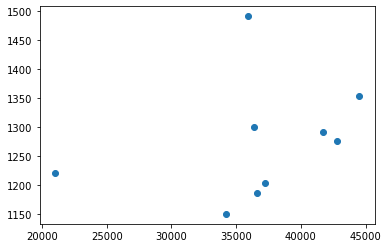

In [172]:
crash_rainfall_df = pd.merge(crash_simple_df,simple_rainfall, on='Year')
crash_rainfall_df = crash_rainfall_df.rename(columns={'Crash ID':'# of Crashes',
                                                     'Rainfall':'Rainfall (mm)'})
crash_rainfall_df = crash_rainfall_df[['Year','# of Crashes','Rainfall (mm)']]
crash_rainfall_df=crash_rainfall_df.loc[crash_rainfall_df['Year']>2008]

plt.scatter(crash_rainfall_df['Rainfall (mm)'],crash_rainfall_df['# of Crashes'])

crash_rainfall_df

The correlation coefficient between the Rainfall (mm) and Number of Crashes is: 0.29


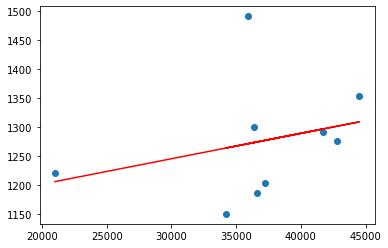

In [173]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(crash_rainfall_df['Rainfall (mm)'],crash_rainfall_df['# of Crashes'])

print(f"The correlation coefficient between the Rainfall (mm) and Number of Crashes is: {rvalue:.2f}")

line = slope*crash_rainfall_df['Rainfall (mm)']+intercept

plt.plot(crash_rainfall_df['Rainfall (mm)'],line,color='red')
plt.scatter(crash_rainfall_df['Rainfall (mm)'],crash_rainfall_df['# of Crashes'])